# **PARTE 1:** Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

## **Carga y Vista General:**

#### ESTRUCTURA Y TIPOS

In [ ]:
import os
import numpy as np
import pandas as pd
import sqlalchemy as sa
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config IPCompleter.greedy = True

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')

#Formato sin notación científica
pd.options.display.float_format = '{:15.2f}'.format 

#Automcompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

#Mostrar el máximo de filas posibles de una tabla
pd.set_option('display.max_rows', 100) #Número de filas que deben verse. None = Máx

#Mostrar el máximo de columnas posibles de una tabla
pd.set_option('display.max_columns', None) #Número de columnas que deben verse. None = Máx

#Mostrar mas caracteres de las columnas. Se usa cuando se corta el texto
pd.set_option('display.max_colwidth', None) #Número de caractres que deben verse. None = Máx


In [2]:
#Cargamos los datos desde github para que sea ejecutable desde cualquier equipo
url = 'https://raw.githubusercontent.com/OscarFraile/EVOLVE/refs/heads/main/Raul_Navas_Estadistica/Notebooks/Practicas/Madrid_Sale.csv'
df = pd.read_csv(url)

In [3]:
# Extraemos las primeras filas del dataset
df.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
0,A15019136831406238029,201803,126000.00,2680.85,47,1,1,0,1,1,3,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,2005.00,1.00,1.00,2005,7,319,3.00,0,1,0,8.06,0.87,6.87,-3.77,40.36
1,A6677225905472065344,201803,235000.00,4351.85,54,1,1,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.00,2.00,1900,5,11,3.00,0,0,1,0.88,0.12,1.54,-3.71,40.42
2,A13341979748618524775,201803,373000.00,4973.33,75,2,1,0,0,1,3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,NaN,3.00,1.00,1915,6,26,3.00,0,0,1,0.91,0.14,1.61,-3.71,40.42
3,A4775182175615276542,201803,284000.00,5916.67,48,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.00,2.00,1947,9,15,5.00,0,0,1,0.85,0.14,1.52,-3.71,40.42
4,A2492087730711701973,201803,228000.00,4560.00,50,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1930.00,0.00,1.00,1930,5,19,7.00,0,0,1,1.25,0.34,1.79,-3.71,40.41


In [4]:
# Información sobre df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94815 entries, 0 to 94814
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ASSETID                        94815 non-null  object 
 1   PERIOD                         94815 non-null  int64  
 2   PRICE                          94815 non-null  float64
 3   UNITPRICE                      94815 non-null  float64
 4   CONSTRUCTEDAREA                94815 non-null  int64  
 5   ROOMNUMBER                     94815 non-null  int64  
 6   BATHNUMBER                     94815 non-null  int64  
 7   HASTERRACE                     94815 non-null  int64  
 8   HASLIFT                        94815 non-null  int64  
 9   HASAIRCONDITIONING             94815 non-null  int64  
 10  AMENITYID                      94815 non-null  int64  
 11  HASPARKINGSPACE                94815 non-null  int64  
 12  ISPARKINGSPACEINCLUDEDINPRICE  94815 non-null 

In [5]:
# Identificamos los tipos de variables para incorporarlos a la descripción
df.dtypes

ASSETID                           object
PERIOD                             int64
PRICE                            float64
UNITPRICE                        float64
CONSTRUCTEDAREA                    int64
ROOMNUMBER                         int64
BATHNUMBER                         int64
HASTERRACE                         int64
HASLIFT                            int64
HASAIRCONDITIONING                 int64
AMENITYID                          int64
HASPARKINGSPACE                    int64
ISPARKINGSPACEINCLUDEDINPRICE      int64
PARKINGSPACEPRICE                  int64
HASNORTHORIENTATION                int64
HASSOUTHORIENTATION                int64
HASEASTORIENTATION                 int64
HASWESTORIENTATION                 int64
HASBOXROOM                         int64
HASWARDROBE                        int64
HASSWIMMINGPOOL                    int64
HASDOORMAN                         int64
HASGARDEN                          int64
ISDUPLEX                           int64
ISSTUDIO        

In [6]:
# Visualizamos las dimensiones del data set
df.shape

(94815, 41)

In [7]:
# Buscamos columnas que sean constantes pero vemos que no hay ninguna
df.nunique().sort_values(ascending=True)

HASTERRACE                           2
HASPARKINGSPACE                      2
HASNORTHORIENTATION                  2
HASSOUTHORIENTATION                  2
ISPARKINGSPACEINCLUDEDINPRICE        2
HASLIFT                              2
HASAIRCONDITIONING                   2
ISSTUDIO                             2
ISDUPLEX                             2
HASGARDEN                            2
HASDOORMAN                           2
HASSWIMMINGPOOL                      2
HASWARDROBE                          2
HASBOXROOM                           2
HASWESTORIENTATION                   2
HASEASTORIENTATION                   2
FLATLOCATIONID                       2
ISINTOPFLOOR                         2
BUILTTYPEID_2                        2
BUILTTYPEID_1                        2
BUILTTYPEID_3                        2
AMENITYID                            3
PERIOD                               4
CADASTRALQUALITYID                  10
FLOORCLEAN                          13
BATHNUMBER               

#### DUPLICADOS

##### ASSETID

In [8]:
# Entendemos que tiene sentido hacer índice la columna ASSETID pero observamos que hay valores repetidos. Estos valores
# existen porque se han hecho publicado diferentes anuncios con variaciones de precio del inmueble en el mismo periodo
# de tiempo, por lo que aparece como un nuevo registro, por lo que hay 94815 registros y 75804 ASSETID
df.nunique().sort_values(ascending=False)

LONGITUDE                        94713
DISTANCE_TO_CITY_CENTER          94713
LATITUDE                         94713
DISTANCE_TO_CASTELLANA           94707
DISTANCE_TO_METRO                94445
ASSETID                          75804
UNITPRICE                        31151
PRICE                             2761
CONSTRUCTEDAREA                    558
CADDWELLINGCOUNT                   329
CONSTRUCTIONYEAR                   191
CADCONSTRUCTIONYEAR                168
PARKINGSPACEPRICE                  146
CADMAXBUILDINGFLOOR                 26
ROOMNUMBER                          21
BATHNUMBER                          18
FLOORCLEAN                          13
CADASTRALQUALITYID                  10
PERIOD                               4
AMENITYID                            3
HASTERRACE                           2
HASLIFT                              2
ISPARKINGSPACEINCLUDEDINPRICE        2
HASPARKINGSPACE                      2
HASAIRCONDITIONING                   2
ISSTUDIO                 

In [9]:
# Observamos que hay inmuebles que se han publicado en varias ocasiones, por lo que vamos a eliminar los duplicados y a
# quedarnos con el primero que aparezca en el dataset
counts = df['ASSETID'].value_counts()
repetidos = counts[counts > 1]
print(repetidos)

ASSETID
A5463639993615125363     11
A2282202115281541721      9
A14882068007191593522     9
A1315840462730187222      8
A5953256861383778054      7
                         ..
A13498463812841109246     2
A11434762754560207282     2
A245971519647496657       2
A13123848576498470228     2
A17082387963892631769     2
Name: count, Length: 13829, dtype: int64


In [10]:
# Extraemos una tabla con los duplicados para confirmar las discrepancias
duplicados = df[df.duplicated(subset='ASSETID', keep='first')]
duplicados.sort_values('ASSETID')

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
66878,A10001362419935476012,201803,215000.00,7678.57,28,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,6.00,1.00,1890,6,13,3.00,0,0,1,0.27,0.32,1.08,-3.71,40.42
21455,A10001362419935476012,201803,210000.00,7500.00,28,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,6.00,1.00,1890,6,13,3.00,0,0,1,0.34,0.26,1.16,-3.71,40.42
87448,A10001425521130099891,201812,387000.00,2976.92,130,4,2,1,1,0,3,1,1,1,0,0,1,1,0,1,1,0,1,0,0,0,NaN,2.00,1.00,1991,7,87,4.00,0,0,1,6.52,0.55,5.31,-3.63,40.42
91162,A10001980858746879564,201803,270000.00,2700.00,100,3,2,0,1,1,3,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,NaN,1.00,1.00,2005,7,203,4.00,0,0,1,9.17,0.18,8.03,-3.60,40.40
33347,A10001980858746879564,201803,271000.00,2710.00,100,3,2,0,1,1,3,1,1,1,0,1,1,0,1,1,1,0,1,0,0,0,NaN,1.00,1.00,2005,7,203,4.00,0,0,1,9.18,0.16,8.05,-3.60,40.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41334,A9995962414057013729,201812,677000.00,6044.64,112,1,1,0,1,0,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1.00,1.00,1967,5,18,6.00,1,0,0,0.69,0.19,0.47,-3.70,40.42
20572,A9995962414057013729,201812,664000.00,5928.57,112,1,1,0,1,0,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1.00,1.00,1967,5,18,6.00,1,0,0,0.75,0.10,0.50,-3.70,40.42
37580,A9998114233912501493,201812,856000.00,7193.28,119,2,2,0,1,1,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,2.00,1.00,1944,3,3,3.00,0,0,1,0.15,0.29,0.69,-3.70,40.42
91094,A9998712247880672923,201812,805000.00,4908.54,164,2,2,0,0,1,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1880.00,3.00,1.00,1880,4,10,4.00,0,0,1,0.59,0.18,0.35,-3.70,40.41


In [11]:
# Eliminamos los duplicados y nos quedamos con el primero que aparezca en el dataset
df = df.drop_duplicates(subset='ASSETID', keep='first')
df

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
0,A15019136831406238029,201803,126000.00,2680.85,47,1,1,0,1,1,3,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,2005.00,1.00,1.00,2005,7,319,3.00,0,1,0,8.06,0.87,6.87,-3.77,40.36
1,A6677225905472065344,201803,235000.00,4351.85,54,1,1,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.00,2.00,1900,5,11,3.00,0,0,1,0.88,0.12,1.54,-3.71,40.42
2,A13341979748618524775,201803,373000.00,4973.33,75,2,1,0,0,1,3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,NaN,3.00,1.00,1915,6,26,3.00,0,0,1,0.91,0.14,1.61,-3.71,40.42
3,A4775182175615276542,201803,284000.00,5916.67,48,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.00,2.00,1947,9,15,5.00,0,0,1,0.85,0.14,1.52,-3.71,40.42
4,A2492087730711701973,201803,228000.00,4560.00,50,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1930.00,0.00,1.00,1930,5,19,7.00,0,0,1,1.25,0.34,1.79,-3.71,40.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94620,A571333680340351890,201812,152000.00,2000.00,76,3,2,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1972.00,2.00,NaN,1972,4,9,6.00,0,0,1,8.58,0.84,6.90,-3.61,40.44
94621,A8743337170237196617,201812,242000.00,2200.00,110,4,2,0,1,1,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1987.00,1.00,1.00,1987,7,22,5.00,0,0,1,8.59,0.71,6.95,-3.61,40.44
94730,A17390996892963923855,201812,107000.00,4280.00,25,1,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1930.00,0.00,NaN,1930,6,33,4.00,0,0,1,3.03,0.29,1.03,-3.70,40.44
94750,A594657524104116520,201812,145000.00,1883.12,77,2,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1965.00,1.00,1.00,1965,4,5,5.00,0,1,0,4.30,0.11,3.84,-3.74,40.39


#### VARIABLES DE TIEMPO

##### PERIOD

In [12]:
# Observamos que en la columna PERIOD solamente hay 4 valores que corresponden a las mediciones que se han
# hecho trimestralmente de los precios. Vamos a transformar esta columna en un datetime para poder trabajar con ella
df['PERIOD'].unique()

array([201803, 201809, 201812, 201806])

In [13]:
# Hacemos datetime la columna PERIOD 
df['PERIOD'] = pd.to_datetime(df['PERIOD'].astype(str), format='%Y%m')

# Establecemos PERIOD como índice para usar sus propiedades
#df = df.reset_index()
df = df.set_index('PERIOD')

def componentes_fecha(dataframe):
    # Convertimos el índice a datetime para poder extraer los componentes
    fecha_index = pd.to_datetime(dataframe.index.astype(str), format='%Y-%m-%d')
    
    año = fecha_index.year
    mes = fecha_index.month
    dia = fecha_index.day
    
    return pd.DataFrame({'MES_2018': mes}, index=dataframe.index)

# Como PERIOD ya es el índice, concatenamos directamente y volvemos a establecer ASSETID como índice
df = pd.concat([df, componentes_fecha(df)], axis=1).set_index('ASSETID')

#Reorganizamos el dataset para volver a tener la columna referente a la fecha al principio
#Sacamos una lista de todas las columnas
list(df.columns)

#Extraemos las columnas que queremos modificar y las ponemos en el orden que queremos que aparezcan
reorden = ['MES_2018']

#Hacemos una lista con el resto de columnas 
resto = df.drop(columns = reorden).columns.to_list()
resto

#Agregamos ambas listas
orden = reorden + resto
df = df[orden]
df

,MES_2018,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A15019136831406238029,3,126000.00,2680.85,47,1,1,0,1,1,3,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,2005.00,1.00,1.00,2005,7,319,3.00,0,1,0,8.06,0.87,6.87,-3.77,40.36
A6677225905472065344,3,235000.00,4351.85,54,1,1,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.00,2.00,1900,5,11,3.00,0,0,1,0.88,0.12,1.54,-3.71,40.42
A13341979748618524775,3,373000.00,4973.33,75,2,1,0,0,1,3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,NaN,3.00,1.00,1915,6,26,3.00,0,0,1,0.91,0.14,1.61,-3.71,40.42
A4775182175615276542,3,284000.00,5916.67,48,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.00,2.00,1947,9,15,5.00,0,0,1,0.85,0.14,1.52,-3.71,40.42
A2492087730711701973,3,228000.00,4560.00,50,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1930.00,0.00,1.00,1930,5,19,7.00,0,0,1,1.25,0.34,1.79,-3.71,40.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A571333680340351890,12,152000.00,2000.00,76,3,2,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1972.00,2.00,NaN,1972,4,9,6.00,0,0,1,8.58,0.84,6.90,-3.61,40.44
A8743337170237196617,12,242000.00,2200.00,110,4,2,0,1,1,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1987.00,1.00,1.00,1987,7,22,5.00,0,0,1,8.59,0.71,6.95,-3.61,40.44
A17390996892963923855,12,107000.00,4280.00,25,1,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1930.00,0.00,NaN,1930,6,33,4.00,0,0,1,3.03,0.29,1.03,-3.70,40.44


#### NULOS

##### VARIABLES:
- CONSTRUCTIONYEAR
- FLATLOCATIONID
- FLOORCLEAN

In [14]:
# Identificamos los nulos 
df.isna().sum().sort_values(ascending = False)

CONSTRUCTIONYEAR                 45574
FLATLOCATIONID                    5162
FLOORCLEAN                        3114
CADASTRALQUALITYID                   1
MES_2018                             0
PRICE                                0
UNITPRICE                            0
CONSTRUCTEDAREA                      0
HASLIFT                              0
HASTERRACE                           0
BATHNUMBER                           0
ROOMNUMBER                           0
HASAIRCONDITIONING                   0
AMENITYID                            0
HASPARKINGSPACE                      0
ISPARKINGSPACEINCLUDEDINPRICE        0
HASWESTORIENTATION                   0
HASBOXROOM                           0
HASWARDROBE                          0
HASSWIMMINGPOOL                      0
PARKINGSPACEPRICE                    0
HASNORTHORIENTATION                  0
HASSOUTHORIENTATION                  0
HASEASTORIENTATION                   0
ISSTUDIO                             0
ISDUPLEX                 

##### CONSTRUCTIONYEAR

Vamos a realizar dos acciones sobre esta variable.
- Vamos a generar una columna binaria para identificar los registros informados y los que no lo están
- Vamos a realizar una imputación de los 45574 registros según la distribución que tienen los datos y después vamos a agruparlos de 20 en 20 años para poder clasificarlos y que ayuden a nuestro modelo y de esta forma no tendremos que hacer tratamiento de atípicos que hemos detectado

In [15]:
df.CONSTRUCTIONYEAR.value_counts(ascending=False, dropna=False)

CONSTRUCTIONYEAR
NaN        45574
1960.00     1864
1970.00     1646
1965.00     1462
1900.00     1284
           ...  
1655.00        1
350.00         1
1067.00        1
49.00          1
225.00         1
Name: count, Length: 191, dtype: int64

In [16]:
df.loc[df.CONSTRUCTIONYEAR < 1800].CONSTRUCTIONYEAR.value_counts().sort_index()

CONSTRUCTIONYEAR
1.00       1
7.00       1
19.00      2
48.00      1
49.00      1
50.00      2
54.00      1
160.00     1
173.00     1
190.00     1
195.00     1
198.00     3
225.00     1
350.00     1
1056.00    1
1067.00    1
1070.00    1
1073.00    1
1197.00    1
1623.00    2
1627.00    1
1655.00    1
1692.00    1
1696.00    1
1700.00    1
1723.00    1
1730.00    1
1780.00    1
Name: count, dtype: int64

In [17]:
def crear_columna_imputacion(dataframe, columna):
    """
    Crea la columna CONSTRUCTIONYEAR_IMPUT:
    1 = Dato informado originalmente
    0 = Dato nulo (NaN)
    """
    nombre_nueva_col = f"{columna}_IMPUT"
    
    # .notna() nos dará True si el registro está informado, False si es NaN
    # .astype(int) lo convierte en 1 y 0 respectivamente
    df[nombre_nueva_col] = df[columna].notna().astype(int)
    
    return dataframe

df = crear_columna_imputacion(df, 'CONSTRUCTIONYEAR')
df

,MES_2018,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CONSTRUCTIONYEAR_IMPUT
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A15019136831406238029,3,126000.00,2680.85,47,1,1,0,1,1,3,0,0,1,0,0,0,0,1,1,1,1,1,0,0,0,2005.00,1.00,1.00,2005,7,319,3.00,0,1,0,8.06,0.87,6.87,-3.77,40.36,1
A6677225905472065344,3,235000.00,4351.85,54,1,1,0,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.00,2.00,1900,5,11,3.00,0,0,1,0.88,0.12,1.54,-3.71,40.42,0
A13341979748618524775,3,373000.00,4973.33,75,2,1,0,0,1,3,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,NaN,3.00,1.00,1915,6,26,3.00,0,0,1,0.91,0.14,1.61,-3.71,40.42,0
A4775182175615276542,3,284000.00,5916.67,48,1,1,0,1,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1.00,2.00,1947,9,15,5.00,0,0,1,0.85,0.14,1.52,-3.71,40.42,0
A2492087730711701973,3,228000.00,4560.00,50,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1930.00,0.00,1.00,1930,5,19,7.00,0,0,1,1.25,0.34,1.79,-3.71,40.41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A571333680340351890,12,152000.00,2000.00,76,3,2,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1972.00,2.00,NaN,1972,4,9,6.00,0,0,1,8.58,0.84,6.90,-3.61,40.44,1
A8743337170237196617,12,242000.00,2200.00,110,4,2,0,1,1,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1987.00,1.00,1.00,1987,7,22,5.00,0,0,1,8.59,0.71,6.95,-3.61,40.44,1
A17390996892963923855,12,107000.00,4280.00,25,1,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1930.00,0.00,NaN,1930,6,33,4.00,0,0,1,3.03,0.29,1.03,-3.70,40.44,1


In [18]:
# 1. Definimos los años conocidos (solo los que están entre 1800 y 2018 para evitar ruido)
años_validos = df.loc[(df['CONSTRUCTIONYEAR_IMPUT'] == 1) & 
                      (df['CONSTRUCTIONYEAR'] >= 1800) & 
                      (df['CONSTRUCTIONYEAR'] <= 2018), 'CONSTRUCTIONYEAR']

# 2. Identificamos dónde están los nulos
mascara_nulos = df['CONSTRUCTIONYEAR'].isna()

# 3. Generamos una muestra aleatoria de los años válidos para rellenar los nulos
relleno = np.random.choice(años_validos, size=mascara_nulos.sum())

# 4. Aplicamos el relleno
df.loc[mascara_nulos, 'CONSTRUCTIONYEAR'] = relleno

# Convertimos a entero para limpiar los decimales .0
df['CONSTRUCTIONYEAR'] = df['CONSTRUCTIONYEAR'].astype(int)

In [19]:
# Definimos los cortes de 20 en 20 años empezando desde 1800
# El rango llegará hasta 2020 para cubrir los anuncios de 2018
bins = list(range(1800, 2021, 20))
labels = [f"{b}-{b+19}" for b in bins[:-1]]

# Creamos la nueva columna categórica
df['CONSTRUCTION_PERIOD'] = pd.cut(df['CONSTRUCTIONYEAR'], 
                                   bins=bins, 
                                   labels=labels, 
                                   right=False)

# Los años que queden por debajo de 1800 (si no los limpiaste) aparecerán como NaN, 
# podemos agruparlos en "Anterior a 1800"
df['CONSTRUCTION_PERIOD'] = df['CONSTRUCTION_PERIOD'].astype(object).fillna('<1800')

In [20]:
df.CONSTRUCTION_PERIOD.value_counts().sort_index()

CONSTRUCTION_PERIOD
1800-1819       10
1820-1839       12
1840-1859       98
1860-1879      261
1880-1899     1113
1900-1919     5262
1920-1939     5693
1940-1959    10119
1960-1979    30348
1980-1999    10534
2000-2019    12308
<1800           46
Name: count, dtype: int64

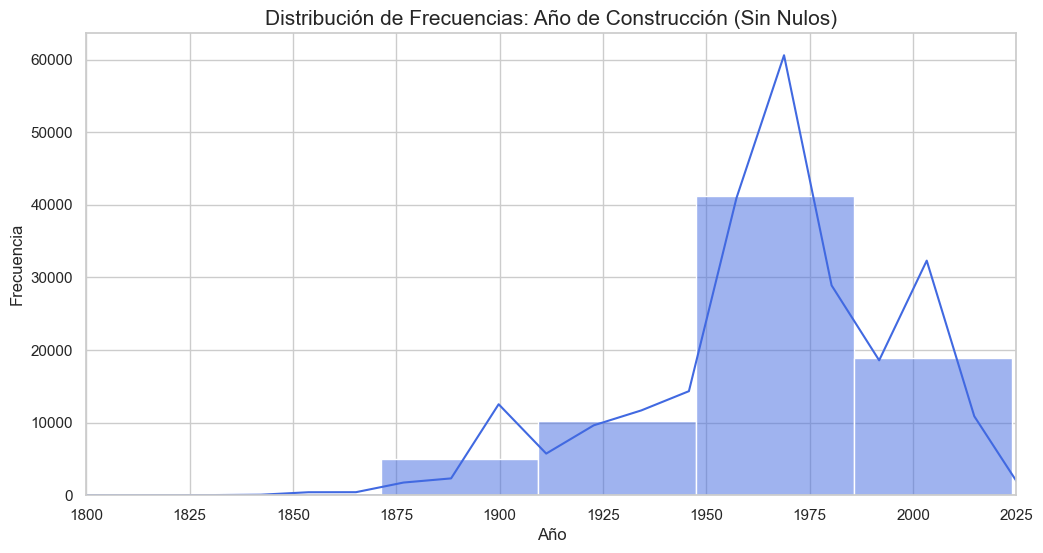

In [21]:
# Vamos a hacer un gráfico de como era la distribución de los datos de CONSTRUCTIONYEAR antes de hacer la imputación
url = 'https://raw.githubusercontent.com/OscarFraile/EVOLVE/refs/heads/main/Raul_Navas_Estadistica/Notebooks/Practicas/Madrid_Sale.csv'
df1 = pd.read_csv(url)

# 1. Filtramos el dataframe para ignorar los nulos en esa columna
df_filtrado = df[df['CONSTRUCTIONYEAR'].notna()]

# 2. Configuramos el estilo
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# 3. Creamos el histograma con los datos filtrados
# Usamos bins=60 para captar bien los picos de construcción
sns.histplot(df_filtrado['CONSTRUCTIONYEAR'], kde=True, color='royalblue', bins=60)

# 4. Ajustes de ejes y títulos
plt.title('Distribución de Frecuencias: Año de Construcción (Sin Nulos)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Limitamos el rango para que sea legible (de 1800 en adelante)
plt.xlim(1800, 2025)

plt.show()

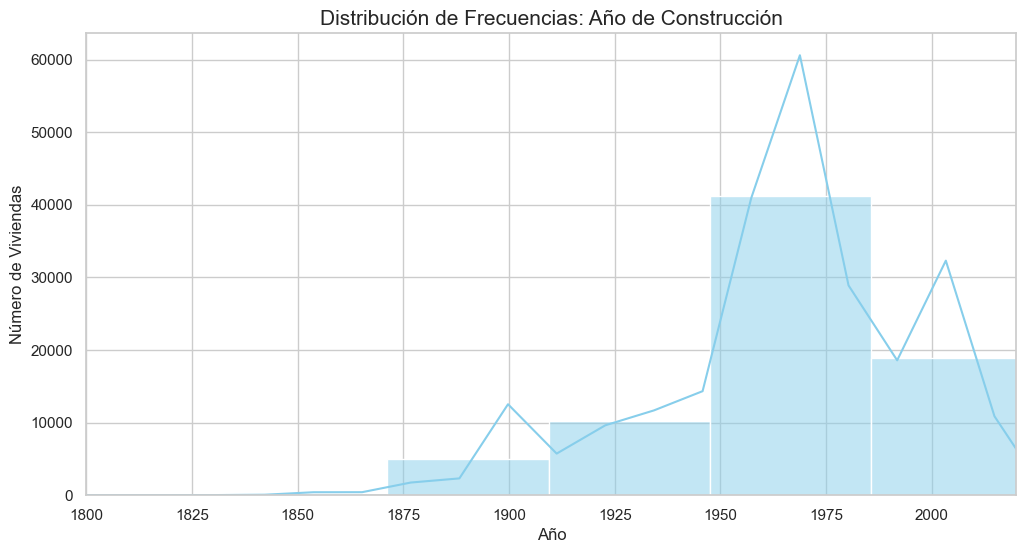

In [22]:
# Hacemos una visualización de la distribución de los datos después de hacer las imputaciones por valores aleatorios
# y comprobamos que siguen una distribución similar, por lo que podemos seguir trabajando con ellos
#  Configuramos el estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Creamos el histograma
# bins=50 para ver detalle, o puedes usar bins=list(range(1800, 2025, 5))
plot = sns.histplot(df['CONSTRUCTIONYEAR'], kde=True, color='skyblue', bins=60)

# Añadimos títulos y etiquetas
plt.title('Distribución de Frecuencias: Año de Construcción', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Viviendas', fontsize=12)

# Limitamos el eje X para evitar que los errores (años 1, 7, etc.) deformen la gráfica
# Solo mostramos desde 1800 hasta la actualidad
plt.xlim(1800, 2020)

plt.show()

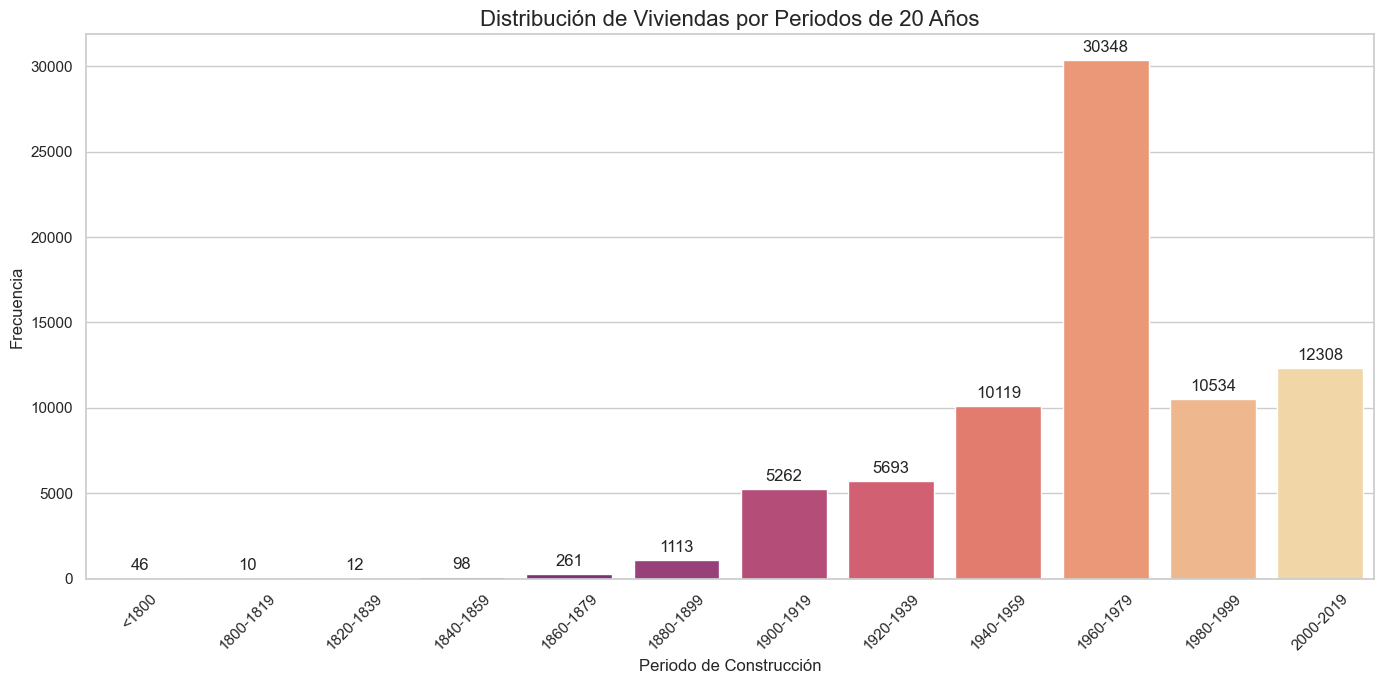

In [23]:
# Visualizamos los datos de la columna CONSTRUCTIONYEAR_PERIOD 

# 1. Preparar los datos (aseguramos el orden cronológico para la gráfica)
orden_periodos = [
    '<1800', '1800-1819', '1820-1839', '1840-1859', '1860-1879', 
    '1880-1899', '1900-1919', '1920-1939', '1940-1959', '1960-1979', 
    '1980-1999', '2000-2019'
]

# 2. Configurar el estilo
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

# 3. Crear el gráfico de barras
# Usamos order=orden_periodos para que no se desordenen alfabéticamente
barplot = sns.countplot(
    data=df, 
    x='CONSTRUCTION_PERIOD', 
    palette='magma', 
    order=orden_periodos
)

# 4. Añadir etiquetas de cantidad sobre cada barra
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# 5. Títulos y ajustes
plt.title('Distribución de Viviendas por Periodos de 20 Años', fontsize=16)
plt.xlabel('Periodo de Construcción', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [24]:
df.isna().sum().sort_values(ascending=False)

FLATLOCATIONID                   5162
FLOORCLEAN                       3114
CADASTRALQUALITYID                  1
UNITPRICE                           0
ROOMNUMBER                          0
BATHNUMBER                          0
HASTERRACE                          0
CONSTRUCTEDAREA                     0
MES_2018                            0
PRICE                               0
AMENITYID                           0
HASAIRCONDITIONING                  0
HASLIFT                             0
HASPARKINGSPACE                     0
HASSOUTHORIENTATION                 0
ISPARKINGSPACEINCLUDEDINPRICE       0
PARKINGSPACEPRICE                   0
HASNORTHORIENTATION                 0
HASWARDROBE                         0
HASSWIMMINGPOOL                     0
HASDOORMAN                          0
HASGARDEN                           0
ISDUPLEX                            0
HASEASTORIENTATION                  0
HASWESTORIENTATION                  0
HASBOXROOM                          0
CONSTRUCTION

##### FLATLOCATIONID

Observamos nulos y los vamos a imputar por una categoría 3.0 para tenerlos identificados

In [25]:
df.FLATLOCATIONID.value_counts(dropna=False).sort_index()

FLATLOCATIONID
1.00    60912
2.00     9730
NaN      5162
Name: count, dtype: int64

In [26]:
df['FLATLOCATIONID'] = df['FLATLOCATIONID'].fillna(3.0)
df.FLATLOCATIONID.value_counts(dropna=False).sort_index()

FLATLOCATIONID
1.00    60912
2.00     9730
3.00     5162
Name: count, dtype: int64

##### FLOORCLEAN

Imputamos los nulos por valores aleatorios siguiendo la distribución de los registros identificados

In [27]:
df.FLOORCLEAN.value_counts(dropna=False).sort_index()

FLOORCLEAN
-1.00      751
0.00      8129
1.00     16193
2.00     13583
3.00     11797
4.00      9391
5.00      4904
6.00      2989
7.00      1938
8.00      1185
9.00       647
10.00      352
11.00      831
NaN       3114
Name: count, dtype: int64

In [28]:
# Hacemos una imputación aleatoria de los nulos de la variable FLOORCLEAN

# 1. Columna de control
df['FLOORCLEAN_IMPUT'] = df['FLOORCLEAN'].notna().astype(int)

# 2. Valores disponibles para copiar la distribución
plantas_validas = df['FLOORCLEAN'].dropna()

# 3. Rellenar nulos con valores enteros de la distribución
mask_nulos = df['FLOORCLEAN'].isna()
df.loc[mask_nulos, 'FLOORCLEAN'] = np.random.choice(plantas_validas, size=mask_nulos.sum())

# 4. Asegurar tipo entero
df['FLOORCLEAN'] = df['FLOORCLEAN'].astype(int)

df.FLOORCLEAN.value_counts(dropna=False).sort_index()

FLOORCLEAN
-1       780
 0      8461
 1     16893
 2     14146
 3     12316
 4      9788
 5      5102
 6      3129
 7      2022
 8      1239
 9       682
 10      368
 11      878
Name: count, dtype: int64

## **Clasificación de Variables:**

### Dataset de viviendas en Madrid (Idealista 2018)

Este dataset recoge información detallada y georreferenciada sobre anuncios inmobiliarios en Madrid en 2018, extraída de Idealista. Incluye más de **180.000 viviendas** (Madrid, Barcelona y Valencia, aunque aquí nos centramos en Madrid), con datos de precios, características del inmueble y variables espaciales relevantes para estudios urbanos y análisis del mercado inmobiliario.

Los datos fueron anonimizados y son especialmente útiles para:

- Modelos de precios  
- Análisis urbano  
- Estudios de accesibilidad y localización  
- Ciencia de datos aplicada al real estate  

---

#### Descripción de las columnas

De cara a ahorrar espacio, voy a hacer una descripción de cada variable y voy a añadir la información de los tipos de variables que son cada una en el momento de la carga del dataset original. Mas tarde se harán las modificaciones y se explicarán de manera individual

##### Identificación y tiempo
- **ASSETID**: Identificador único de cada vivienda. Nominal // object
- **PERIOD**: Periodo temporal del anuncio en formato `YYYYMM`. Ordinal // int

##### Precio y superficie
- **PRICE**: Precio total del inmueble (€). Continua // float
- **UNITPRICE**: Precio por metro cuadrado (€ / m²). Continua // float
- **CONSTRUCTEDAREA**: Superficie construida en metros cuadrados. Continua // int

##### Distribución
- **ROOMNUMBER**: Número total de habitaciones. Discreta // int
- **BATHNUMBER**: Número de baños. Discreta // int

##### Características del inmueble (binarias: 1 = sí, 0 = no)
- **HASTERRACE**: Tiene terraza. Nominal // int
- **HASLIFT**: Tiene ascensor. Nominal // int
- **HASAIRCONDITIONING**: Tiene aire acondicionado. Nominal // int
- **HASPARKINGSPACE**: Incluye plaza de parking. Nominal // int
- **ISPARKINGSPACEINCLUDEDINPRICE**: El parking está incluido en el precio. Nominal // int
- **HASNORTHORIENTATION**: Orientación norte. Nominal // int
- **HASSOUTHORIENTATION**: Orientación sur. Nominal // int
- **HASEASTORIENTATION**: Orientación este. Nominal // int
- **HASWESTORIENTATION**: Orientación oeste. Nominal // int
- **HASBOXROOM**: Tiene trastero. Nominal // int
- **HASWARDROBE**: Tiene armarios empotrados. Nominal // int
- **HASSWIMMINGPOOL**: Tiene piscina. Nominal // int
- **HASDOORMAN**: Tiene portero o conserje. Nominal // int
- **HASGARDEN**: Tiene jardín. Nominal // int
- **ISDUPLEX**: Es un dúplex. Nominal // int
- **ISSTUDIO**: Es un estudio. Nominal // int
- **ISINTOPFLOOR**: Está en la última planta. Nominal // int

##### Parking
- **PARKINGSPACEPRICE**: Precio de la plaza de parking. Continua // int

##### Año y planta
- **CONSTRUCTIONYEAR**: Año de construcción (puede contener NA). Discreta // float
- **FLOORCLEAN**: Planta del inmueble. Discreta // float
- **FLATLOCATIONID**: Código interno de localización del piso. Nominal // float

##### Información catastral
- **CADCONSTRUCTIONYEAR**: Año de construcción según catastro. Discreta // int
- **CADMAXBUILDINGFLOOR**: Número máximo de plantas del edificio. Discreta // int
- **CADDWELLINGCOUNT**: Número de viviendas en el edificio. Discreta // int
- **CADASTRALQUALITYID**: Clasificación de calidad catastral del inmueble. Ordinal // float

##### Tipo de vivienda
- **BUILTTYPEID_1**: Obra nueva. Nominal // int
- **BUILTTYPEID_2**: Segunda mano para reformar. Nominal // int
- **BUILTTYPEID_3**: Segunda mano en buen estado. Nominal // int

##### Variables espaciales
- **DISTANCE_TO_CITY_CENTER**: Distancia al centro de la ciudad (km). Continua // float
- **DISTANCE_TO_METRO**: Distancia a la estación de metro más cercana (km). Continua // float
- **DISTANCE_TO_MAIN_AVENUE**: Distancia al Paseo de la Castellana (km). Continua // float

##### Geolocalización
- **LONGITUDE**: Longitud geográfica. Continua // float
- **LATITUDE**: Latitud geográfica. Continua // float

##### Otros
- **AMENITYID**: Código de amenities asociados al inmueble. Nominal // int

## **Detección de Outliers:**
Debemos trabajar sobre las siguientes variables. Los motivos se explicarán en cada caso y las interpretaciones en el siguiente apartado
- ROOMNUMBER
- BATHNUMBER
- PARKINGSPACEPRICE
- CONSTRUCTEDAREA
- CONSTRUCTIONYEAR
- DISTANCE_TO_CITY_CENTER
- PARKINGSPACEPRICE

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MES_2018,75804.00,8.35,3.63,3.00,6.00,9.00,12.00,12.00
PRICE,75804.00,389544.09,413097.49,21000.00,157000.00,257000.00,457000.00,8133000.00
UNITPRICE,75804.00,3641.58,1712.96,805.31,2206.65,3448.28,4734.04,9997.56
CONSTRUCTEDAREA,75804.00,100.25,66.47,21.00,62.00,82.00,115.00,985.00
ROOMNUMBER,75804.00,2.57,1.25,0.00,2.00,3.00,3.00,93.00
BATHNUMBER,75804.00,1.57,0.84,0.00,1.00,1.00,2.00,20.00
HASTERRACE,75804.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
HASLIFT,75804.00,0.69,0.46,0.00,0.00,1.00,1.00,1.00
HASAIRCONDITIONING,75804.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
AMENITYID,75804.00,2.93,0.31,1.00,3.00,3.00,3.00,3.00


--- ANÁLISIS DE OUTLIERS (CRITERIO IQR) ---
ROOMNUMBER: Límite Superior 4.50 | Máximo Real: 93 | Outliers: 5760
BATHNUMBER: Límite Superior 3.50 | Máximo Real: 20 | Outliers: 2422
PARKINGSPACEPRICE: Límite Superior 1.00 | Máximo Real: 925001 | Outliers: 1620
CONSTRUCTEDAREA: Límite Superior 194.50 | Máximo Real: 985 | Outliers: 5617
CONSTRUCTIONYEAR: Límite Superior 2032.50 | Máximo Real: 2291 | Outliers: 5381
DISTANCE_TO_CITY_CENTER: Límite Superior 11.94 | Máximo Real: 415.752584407362 | Outliers: 568
PARKINGSPACEPRICE: Límite Superior 1.00 | Máximo Real: 925001 | Outliers: 1620


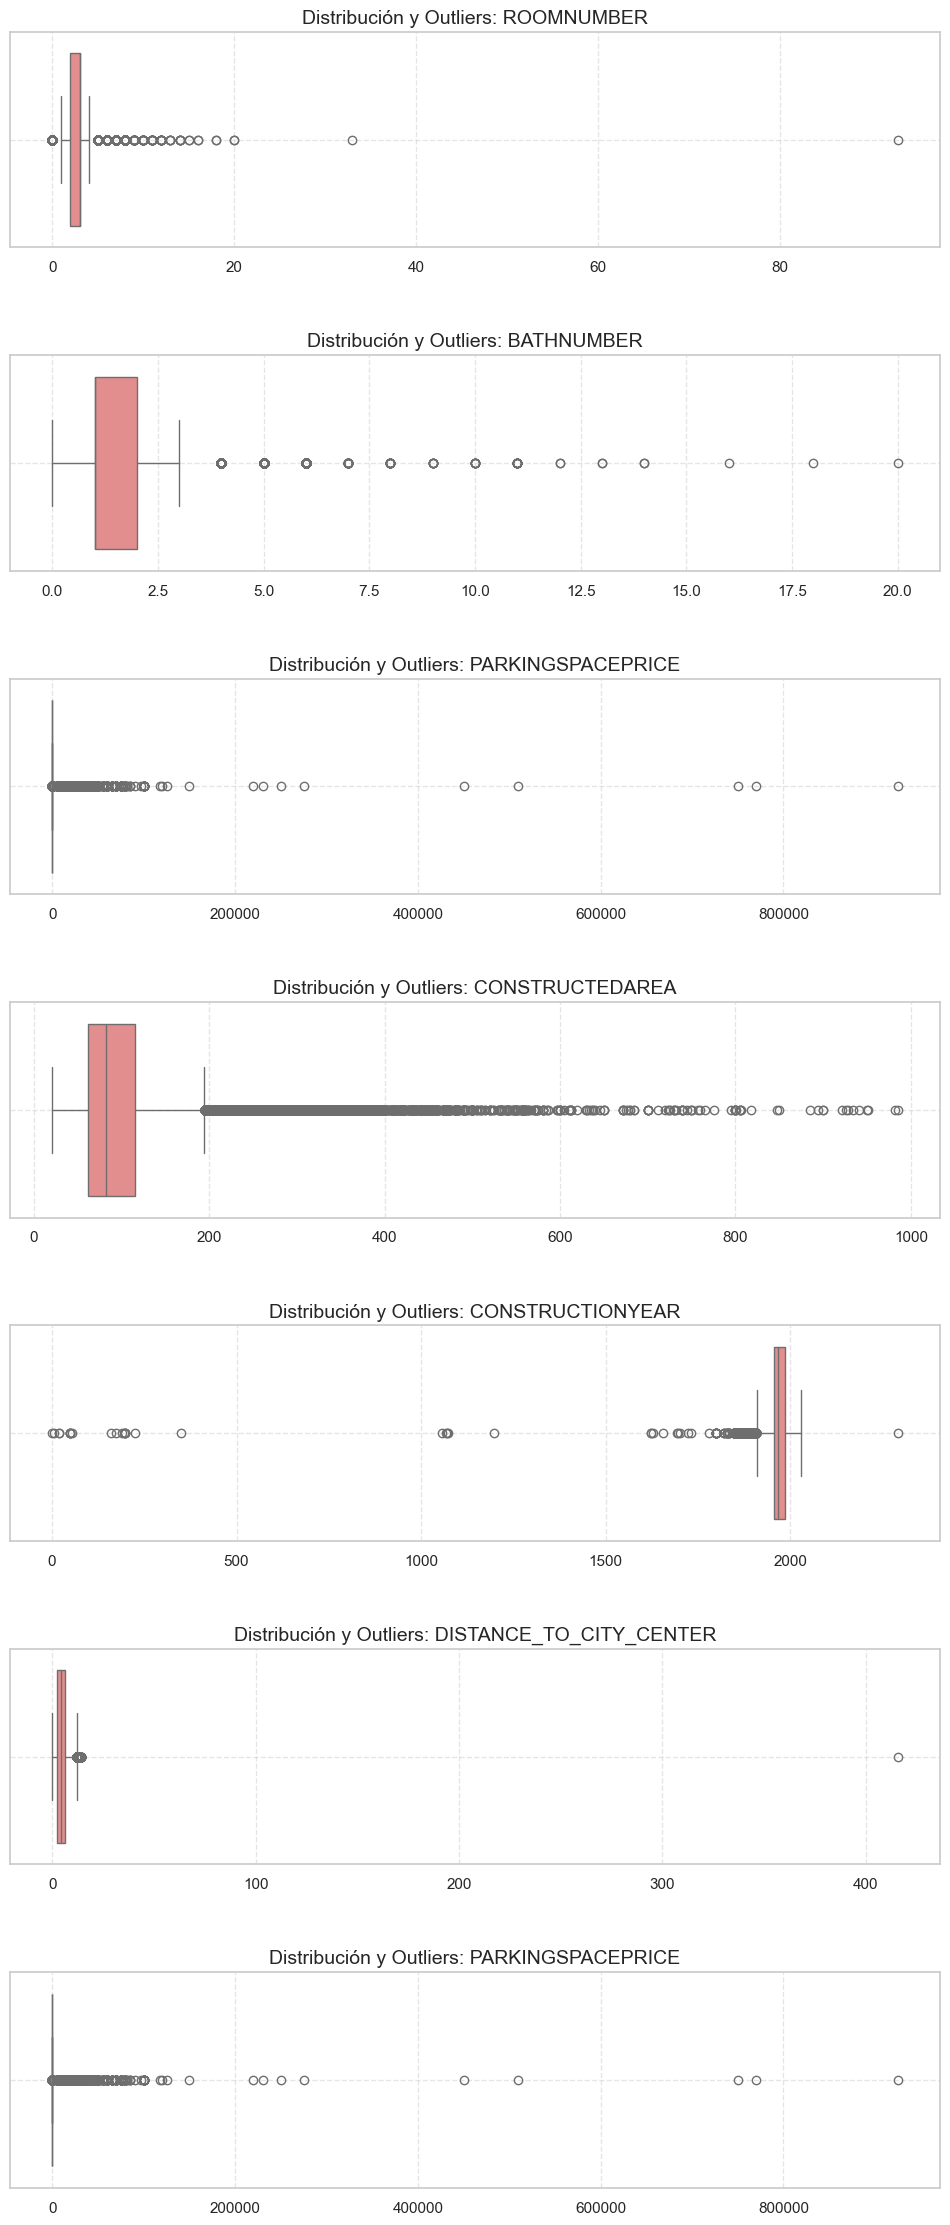

In [30]:
# Análisis de outliers y IQR de todas las variables identificadas previamente
# Lista de variables a analizar
vars_analizar = [
    'ROOMNUMBER',
    'BATHNUMBER',
    'PARKINGSPACEPRICE', 
    'CONSTRUCTEDAREA', 
    'CONSTRUCTIONYEAR', 
    'DISTANCE_TO_CITY_CENTER',
    'PARKINGSPACEPRICE'
]

# Configuración de la figura (5 filas, 1 columna)
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(12, 28))
fig.subplots_adjust(hspace=0.5)

print("--- ANÁLISIS DE OUTLIERS (CRITERIO IQR) ---")

for i, col in enumerate(vars_analizar):
    # Cálculo de IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_sup = Q3 + 1.5 * IQR
    limite_inf = Q1 - 1.5 * IQR
    
    # Conteo de outliers
    num_outliers = len(df[(df[col] < limite_inf) | (df[col] > limite_sup)])
    
    print(f"{col}: Límite Superior {limite_sup:.2f} | Máximo Real: {df[col].max()} | Outliers: {num_outliers}")
    
    # Gráfico
    sns.boxplot(x=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Distribución y Outliers: {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.show()

##### ROOMNUMBER
Observando los datos y por el conocimiento del mercado inmobiliario, vamos a eliminar los registros con mas de 5 habitaciones porque el objetivo de estudio son inmuebles de inversión y no grandes mansiones 

In [31]:
df = df.loc[df.ROOMNUMBER <= 5]

##### BATHNUMBER
Vamos a hacer lo mismo con la variable sobre el número de baños, limitándola a 4 baños

In [32]:
df = df.loc[df.BATHNUMBER <= 4]

##### PARKINGSPACEPRICE

La variable sobre el precio del parking no está bien identificada como podemos observar, que hay 72695 inmuebles cuyo precio del parking es de 1€. Podríamos entender que los valores inferiores a 100€ podrían ser alquileres de plaza de parking pero, como no tenemos mas datos sobre el dataset, vamos a eliminar la variable y a trabajar con la variable HASPARKINGSPACE que no tiene nulos y nos dice si tiene o no parking la propiedad

In [33]:
df.loc[df.PARKINGSPACEPRICE < 100].PARKINGSPACEPRICE.value_counts().sort_index()

PARKINGSPACEPRICE
1     72695
2         7
6         2
7         1
11        2
16        1
17        1
26        3
41        4
51        3
61        2
71        1
76        2
81        3
91        2
96        2
Name: count, dtype: int64

In [34]:
df.HASPARKINGSPACE.value_counts()

HASPARKINGSPACE
0    58388
1    15883
Name: count, dtype: int64

In [35]:
df.drop(columns='PARKINGSPACEPRICE', inplace=True)

##### CONSTRUCTEDAREA

Vamos a limitar también el rango de metros cuadrados a 400m2

In [36]:
df.CONSTRUCTEDAREA.value_counts().sort_index(ascending=False)

CONSTRUCTEDAREA
985      1
950      1
928      1
926      1
922      1
      ... 
25     195
24      63
23      43
22      49
21      50
Name: count, Length: 476, dtype: int64

In [37]:
df = df.loc[df.CONSTRUCTEDAREA <= 400]


##### CONSTRUCTIONYEAR

El dataset trata de precios de inmuebles de 2018, pero tenemos 2 registros con valores muy superiores. Vamos a conservar los datos con valores 2019 y 2020 por si fueran inmuebles en construcción porque podrían ser datos válidos de cara a proyectar futuras inversiones y vamos a eliminar los 2 registros con valores superiores porque nos generarían ruido en el análisis

In [38]:
df.loc[df.CONSTRUCTIONYEAR > 2020]

,MES_2018,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CONSTRUCTIONYEAR_IMPUT,CONSTRUCTION_PERIOD,FLOORCLEAN_IMPUT
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A7594993370594236105,9,665000.00,3911.76,170,3,3,1,1,1,3,1,1,1,1,0,0,1,1,1,1,1,1,0,1,2028,10,1.00,2014,9,87,3.00,0,0,1,11.29,2.58,5.47,-3.62,40.50,1,<1800,1
A569770063753666613,6,277000.00,4616.67,60,2,1,0,1,1,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2291,0,1.00,1964,4,10,3.00,0,0,1,3.59,0.25,1.89,-3.67,40.43,1,<1800,1


In [39]:
df = df.loc[df.CONSTRUCTIONYEAR <= 2020]


##### DISTANCE_TO_CITY_CENTER

Eliminamos los inmuebles con distancia superior a 15km de radio porque quedarían fuera de la zona de estudio

In [40]:
df.loc[df.DISTANCE_TO_CITY_CENTER > 15]

,MES_2018,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CONSTRUCTIONYEAR_IMPUT,CONSTRUCTION_PERIOD,FLOORCLEAN_IMPUT
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A7501251371917084834,6,191000.00,1317.24,145,4,2,0,1,1,2,1,1,0,0,0,0,1,1,0,1,1,0,0,0,2002,7,1.00,2002,1,1,4.00,0,0,1,415.75,399.48,412.80,-2.75,36.76,1,2000-2019,1


In [41]:
df = df.loc[df.DISTANCE_TO_CITY_CENTER <= 15]

##### CADDWELLINGCOUNT

Eliminamos los conjuntos de viviendas de mas de 800 viviendas para evitar ruido ya que es un solo caso que no nos aportaría gran información

In [42]:
df.loc[df.CADDWELLINGCOUNT > 800].sort_values('CADDWELLINGCOUNT', ascending=False)


,MES_2018,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CONSTRUCTIONYEAR_IMPUT,CONSTRUCTION_PERIOD,FLOORCLEAN_IMPUT
ASSETID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A5001174636850707674,12,344000.00,2177.22,158,4,3,1,1,0,3,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1972,2,1.00,1983,5,1499,5.00,0,1,0,8.53,0.20,8.31,-3.79,40.38,0,1960-1979,1


In [43]:
df = df.loc[df.CADDWELLINGCOUNT <= 800]

## **Estadísticos Descriptivos:**

### Análisis Estadístico Descriptivo, Sesgo y conclusiones sobre el dataset
Finalmente nos quedamos con un dataset limitado a inmuebles con variedad de precios hasta los 3.5millones con dimensiones y servicios de todo tipo pero podrían entrar como posibilidades de inversión dependiendo del capital disponible

#### Interpretación de Media vs Mediana (Sesgo)

El análisis de la relación entre la media y la mediana (percentil 50%) nos permite identificar el sesgo de las distribuciones:

* **Variable PRICE (Precio):** Podemos observar sesgo positivo (media > mediana), que se ve en la distribución de los valores que tienden a los precios altos aun después de haber eliminado los precios superiores a 3.5M€
* **Variable CONSTRUCTEDAREA:** Muestra un sesgo positivo moderado (Media 94.6 m² vs Mediana 80 m²). La mayoría de las viviendas se concentran en tamaños estándar, con una minoría de propiedades de gran tamaño que elevan el promedio.
* **Variables de Ubicación (Distancias):** Tras la limpieza, las distancias al centro, metro y Castellana muestran rangos coherentes (máx 15 km). El ligero sesgo positivo indica una mayor densidad de anuncios en el núcleo urbano.
* **Variable ROOMNUMBER:** Presenta una distribución realista (Media 2.49 vs Mediana 3.0). El máximo de 5 habitaciones asegura que el modelo no se vea afectado por errores de carga previos (como el valor de 93 habitaciones).


**Preparación para Modelado:** Al haber eliminado los valores imposibles (como distancias de 400 km o años de construcción futuros), el dataset es ahora robusto para aplicar algoritmos de Machine Learning, minimizando el riesgo de sobreajuste por valores atípicos.



In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MES_2018,74056.00,8.36,3.62,3.00,6.00,9.00,12.00,12.00
PRICE,74056.00,358726.45,326366.21,21000.00,156000.00,251000.00,438000.00,3566000.00
UNITPRICE,74056.00,3611.52,1699.38,805.31,2187.50,3410.00,4700.00,9994.29
CONSTRUCTEDAREA,74056.00,94.64,51.37,21.00,61.00,80.00,112.00,400.00
ROOMNUMBER,74056.00,2.49,1.06,0.00,2.00,3.00,3.00,5.00
BATHNUMBER,74056.00,1.51,0.70,0.00,1.00,1.00,2.00,4.00
HASTERRACE,74056.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
HASLIFT,74056.00,0.68,0.46,0.00,0.00,1.00,1.00,1.00
HASAIRCONDITIONING,74056.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
AMENITYID,74056.00,2.93,0.31,1.00,3.00,3.00,3.00,3.00


## **Visualización de Distribuciones:**

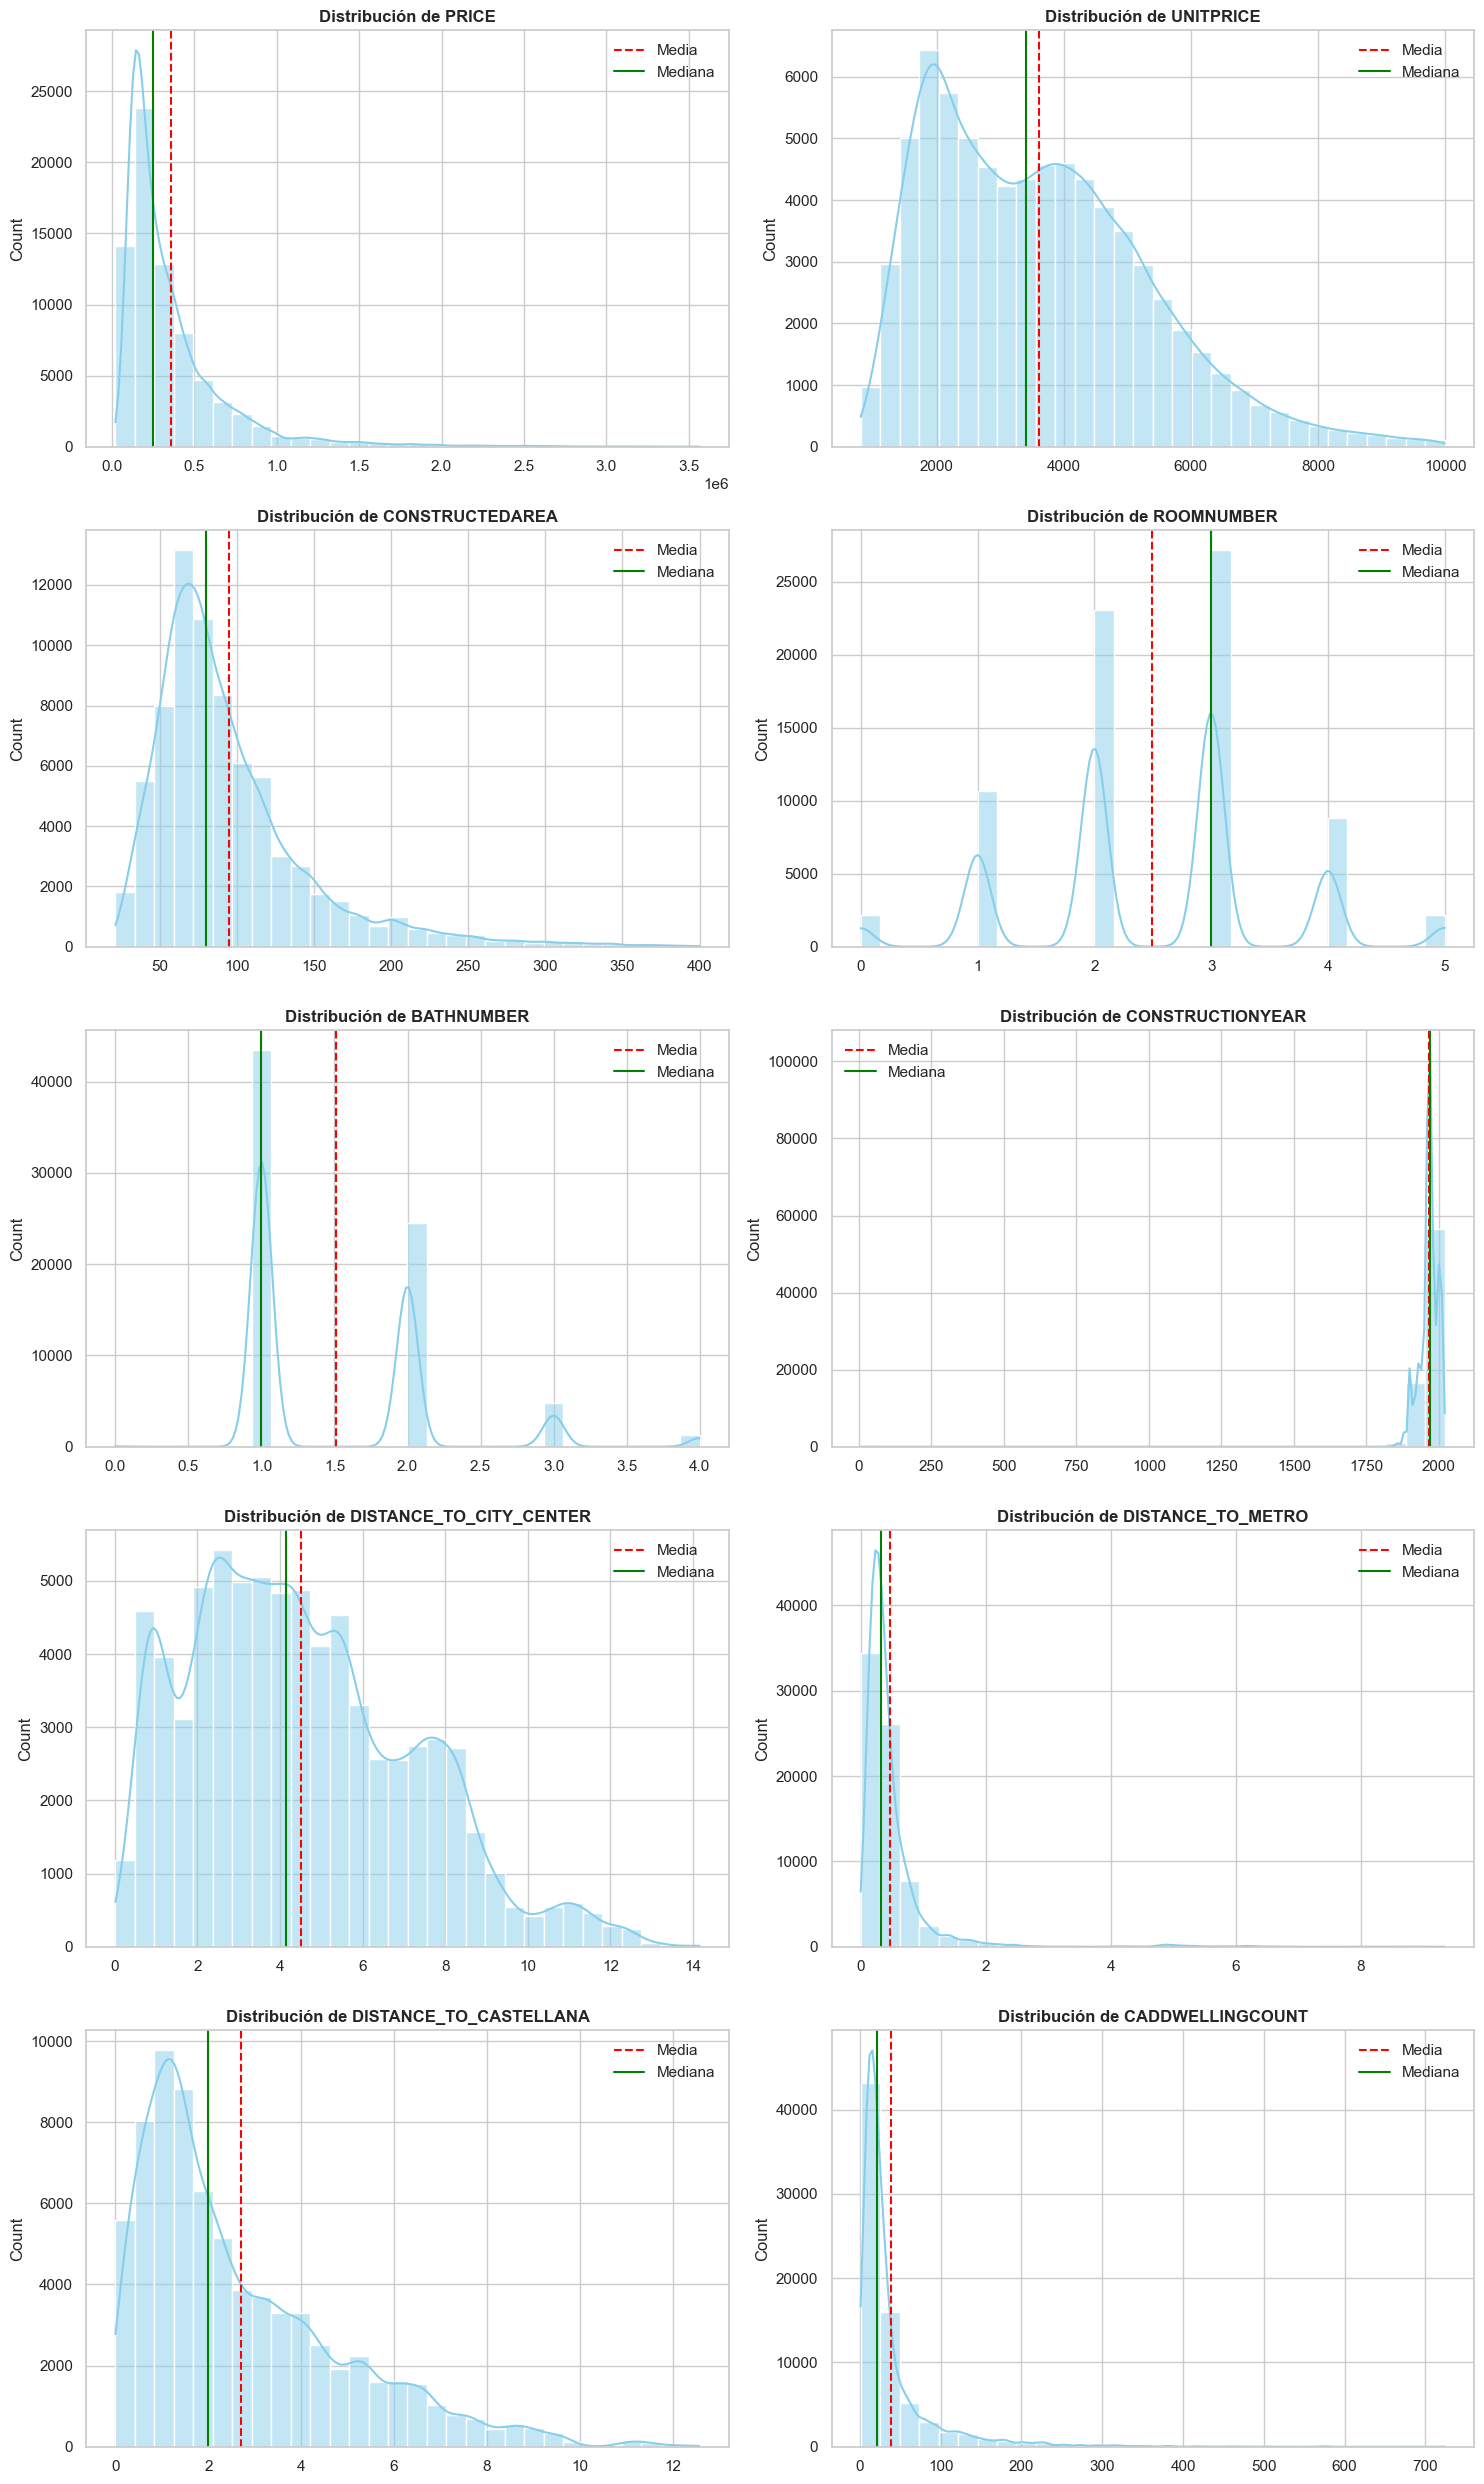

In [ ]:
# 1. Lista de variables numéricas no binarias
vars_histogramas = [
    'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 
    'ROOMNUMBER', 'BATHNUMBER', 'CONSTRUCTIONYEAR', 
    'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 
    'DISTANCE_TO_CASTELLANA', 'CADDWELLINGCOUNT'
]

# 2. Configuración de la malla (5 filas, 2 columnas)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flat # Aplanamos para iterar fácilmente

for i, col in enumerate(vars_histogramas):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue', bins=30)
    
    # Añadimos líneas para Media (roja) y Mediana (verde) para ver el sesgo
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Media')
    axes[i].axvline(df[col].median(), color='green', linestyle='-', label='Mediana')
    
    axes[i].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].legend()

# Ajustar diseño para que no se solapen
plt.tight_layout()
plt.show()

In [ ]:
# Cálculo de Asimetría y Curtosis para CONSTRUCTEDAREA
asimetria = df['CONSTRUCTEDAREA'].skew()
curtosis = df['CONSTRUCTEDAREA'].kurt()

print(f"Variable: CONSTRUCTEDAREA")
print(f"Asimetría (Skewness): {asimetria:.2f}")
print(f"Curtosis: {curtosis:.2f}")

In [ ]:
### 3.5. Análisis de Forma: Asimetría y Curtosis de CONSTRUCTEDAREA

Para profundizar en la naturaleza de la variable **CONSTRUCTEDAREA**, hemos calculado sus momentos estadísticos de tercer y cuarto orden.

#### 1. Asimetría (Skewness)
* **Resultado:** [Inserta aquí el valor, ej. 1.85]
* **Interpretación:** Al ser un valor **positivo**, la distribución presenta una **asimetría positiva (o a la derecha)**.
* **Relación con el Histograma:** Esto confirma visualmente que la mayor parte de las viviendas se concentran en la parte baja/media de la escala (entre 60 y 110 m²), mientras que la "cola" de la distribución se extiende hacia la derecha debido a la existencia de propiedades de gran tamaño (hasta 400 m²). La media es arrastrada por estos valores altos, situándose a la derecha de la mediana.

#### 2. Curtosis
* **Resultado:** [Inserta aquí el valor, ej. 4.12]
* **Interpretación:** Un valor superior a 3 indica una distribución **leptocúrtica**.
* **Relación con el Histograma:** Esto significa que la distribución es más puntiaguda que una distribución normal y posee "colas pesadas". En términos prácticos, indica que hay una alta concentración de viviendas en un rango muy específico de metros cuadrados, pero también una presencia significativa de valores atípicos o extremos (outliers) que se alejan del promedio.



#### Conclusión para el Modelado
La combinación de una asimetría positiva y una curtosis elevada sugiere que la variable no sigue una distribución normal perfecta. Para mejorar el rendimiento de algoritmos lineales, se podría considerar una transformación logarítmica para "normalizar" la campana y reducir el impacto de la cola derecha.

¿Cómo interpretar los números que te salgan?
Si la Asimetría > 0: La cola larga está a la derecha (lo normal en viviendas).

Si la Curtosis > 3: La curva es muy alta en el centro y tiene colas largas (hay muchos pisos "estándar" y algunos muy grandes).

Si la Curtosis < 3: La curva es más plana (la oferta de metros cuadrados está más repartida).

In [ ]:
df_pearson = df.select_dtypes(include=['number', 'bool']).corr(method = 'pearson')
df_pearson

,MES_2018,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CONSTRUCTIONYEAR_IMPUT,FLOORCLEAN_IMPUT
MES_2018,1.00,0.03,0.07,-0.01,-0.02,-0.00,0.00,0.02,0.04,0.02,-0.00,-0.00,0.01,0.02,0.02,0.03,-0.01,0.01,-0.00,0.01,0.01,0.00,0.01,0.01,0.01,-0.00,0.00,-0.01,0.01,-0.01,-0.00,0.01,0.00,-0.01,-0.00,-0.00,-0.01,0.00,0.02,0.07,-0.01
PRICE,0.03,1.00,0.64,0.82,0.40,0.70,0.06,0.36,0.17,-0.01,0.22,0.22,0.05,0.09,0.06,0.09,0.22,0.17,0.13,0.36,0.09,0.05,-0.08,0.03,-0.02,0.19,-0.13,-0.07,0.19,0.03,-0.47,0.03,0.04,-0.05,-0.21,-0.01,-0.25,-0.03,0.27,0.00,0.02
UNITPRICE,0.07,0.64,1.00,0.19,-0.12,0.27,-0.13,0.34,0.19,0.01,0.06,0.06,0.03,0.04,0.04,0.06,0.04,0.16,0.05,0.28,-0.01,0.01,0.08,0.03,-0.07,0.13,0.03,-0.25,0.15,0.01,-0.50,0.01,-0.05,0.04,-0.41,-0.06,-0.42,-0.07,0.35,-0.02,0.03
CONSTRUCTEDAREA,-0.01,0.82,0.19,1.00,0.64,0.78,0.19,0.32,0.12,-0.02,0.30,0.30,0.05,0.10,0.07,0.09,0.30,0.17,0.19,0.34,0.19,0.08,-0.14,0.03,0.03,0.19,-0.19,0.09,0.21,0.08,-0.36,0.05,0.07,-0.09,-0.00,0.04,-0.07,0.01,0.18,0.03,0.00
ROOMNUMBER,-0.02,0.40,-0.12,0.64,1.00,0.54,0.22,0.14,-0.04,-0.01,0.14,0.14,0.04,0.05,0.05,0.06,0.15,0.06,0.04,0.16,0.09,-0.02,-0.39,-0.01,0.01,0.17,-0.16,0.07,0.15,0.04,-0.07,0.00,0.17,-0.16,0.09,0.03,0.05,0.01,0.02,0.02,0.01
BATHNUMBER,-0.00,0.70,0.27,0.78,0.54,1.00,0.14,0.36,0.15,-0.02,0.35,0.35,0.05,0.07,0.06,0.07,0.31,0.21,0.26,0.33,0.24,0.10,-0.10,0.01,0.04,0.16,-0.15,0.13,0.22,0.15,-0.37,0.11,-0.01,-0.04,0.02,0.05,-0.05,0.04,0.18,0.01,-0.00
HASTERRACE,0.00,0.06,-0.13,0.19,0.22,0.14,1.00,0.08,0.06,0.02,0.12,0.12,0.05,0.08,0.07,0.06,0.12,0.13,0.09,0.07,0.14,0.05,-0.07,0.09,0.07,0.18,-0.21,0.19,0.06,0.03,0.04,0.06,0.03,-0.06,0.17,0.04,0.13,0.03,-0.01,0.05,0.03
HASLIFT,0.02,0.36,0.34,0.32,0.14,0.36,0.08,1.00,0.15,0.01,0.29,0.29,0.05,0.06,0.06,0.07,0.23,0.26,0.26,0.35,0.24,0.02,-0.02,-0.00,0.08,0.24,-0.15,0.21,0.37,0.26,-0.37,0.12,-0.03,-0.03,0.01,0.02,-0.06,0.07,0.19,0.03,0.03
HASAIRCONDITIONING,0.04,0.17,0.19,0.12,-0.04,0.15,0.06,0.15,1.00,-0.00,0.17,0.17,0.05,0.11,0.10,0.09,0.14,0.35,0.14,0.18,0.15,0.07,0.02,0.06,0.05,0.11,-0.14,0.10,0.05,0.09,-0.14,-0.14,-0.23,0.27,0.01,0.02,-0.02,0.03,0.06,0.08,0.07
AMENITYID,0.02,-0.01,0.01,-0.02,-0.01,-0.02,0.02,0.01,-0.00,1.00,-0.02,-0.02,0.00,0.02,0.02,-0.00,-0.01,0.02,-0.00,0.03,0.01,0.01,0.01,0.01,-0.01,0.00,-0.08,-0.02,0.00,-0.01,0.01,0.04,-0.01,-0.01,-0.02,-0.01,-0.02,-0.01,0.01,-0.06,0.08


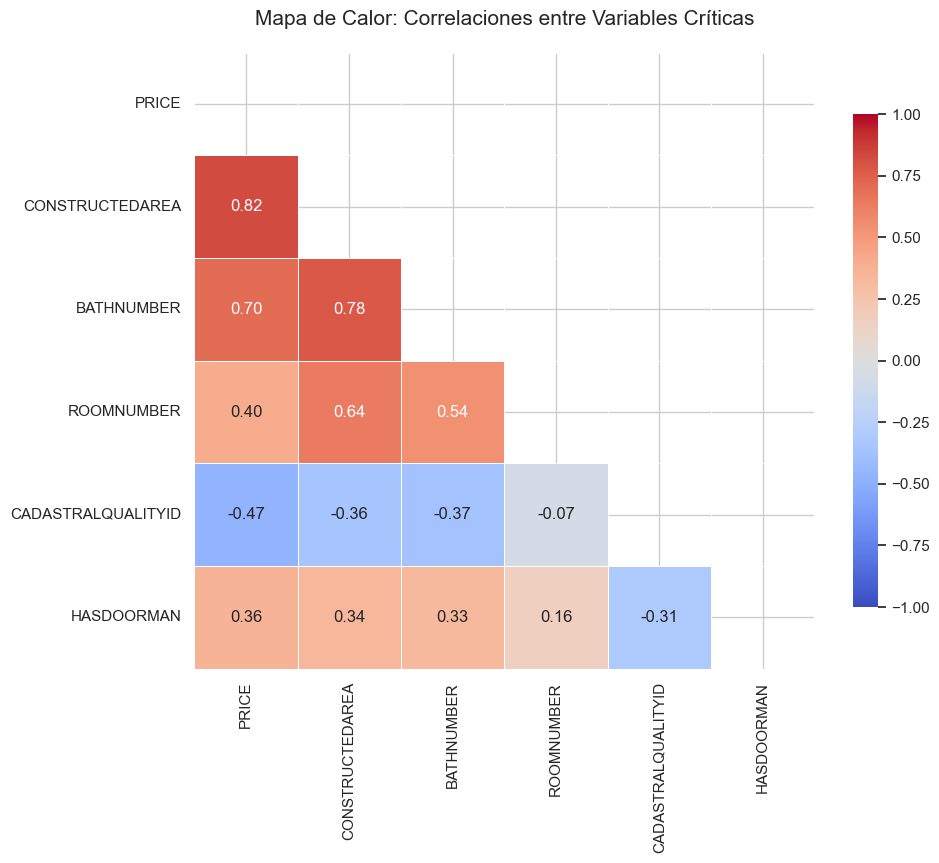

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Usamos la misma lista de variables clave
variables_clave = [
    'PRICE', 
    'CONSTRUCTEDAREA', 
    'BATHNUMBER', 
    'ROOMNUMBER', 
    'CADASTRALQUALITYID',
    'HASDOORMAN'
]

# 2. Calculamos la matriz de correlación solo para esas variables
corr_subset = df[variables_clave].corr()

# 3. Configuramos el gráfico
plt.figure(figsize=(10, 8))

# Creamos una máscara para tapar la mitad superior (opcional, pero queda más limpio)
mask = np.triu(np.ones_like(corr_subset, dtype=bool))

# 4. Dibujamos el heatmap
sns.heatmap(
    corr_subset, 
    mask=mask,
    annot=True,           # Muestra los números dentro de los cuadros
    fmt=".2f",            # Dos decimales
    cmap='coolwarm',      # Azul (negativo) a Rojo (positivo)
    vmin=-1, vmax=1,      # Escala fija de la correlación de Pearson
    center=0,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title('Mapa de Calor: Correlaciones entre Variables Críticas', fontsize=15, pad=20)
plt.show()

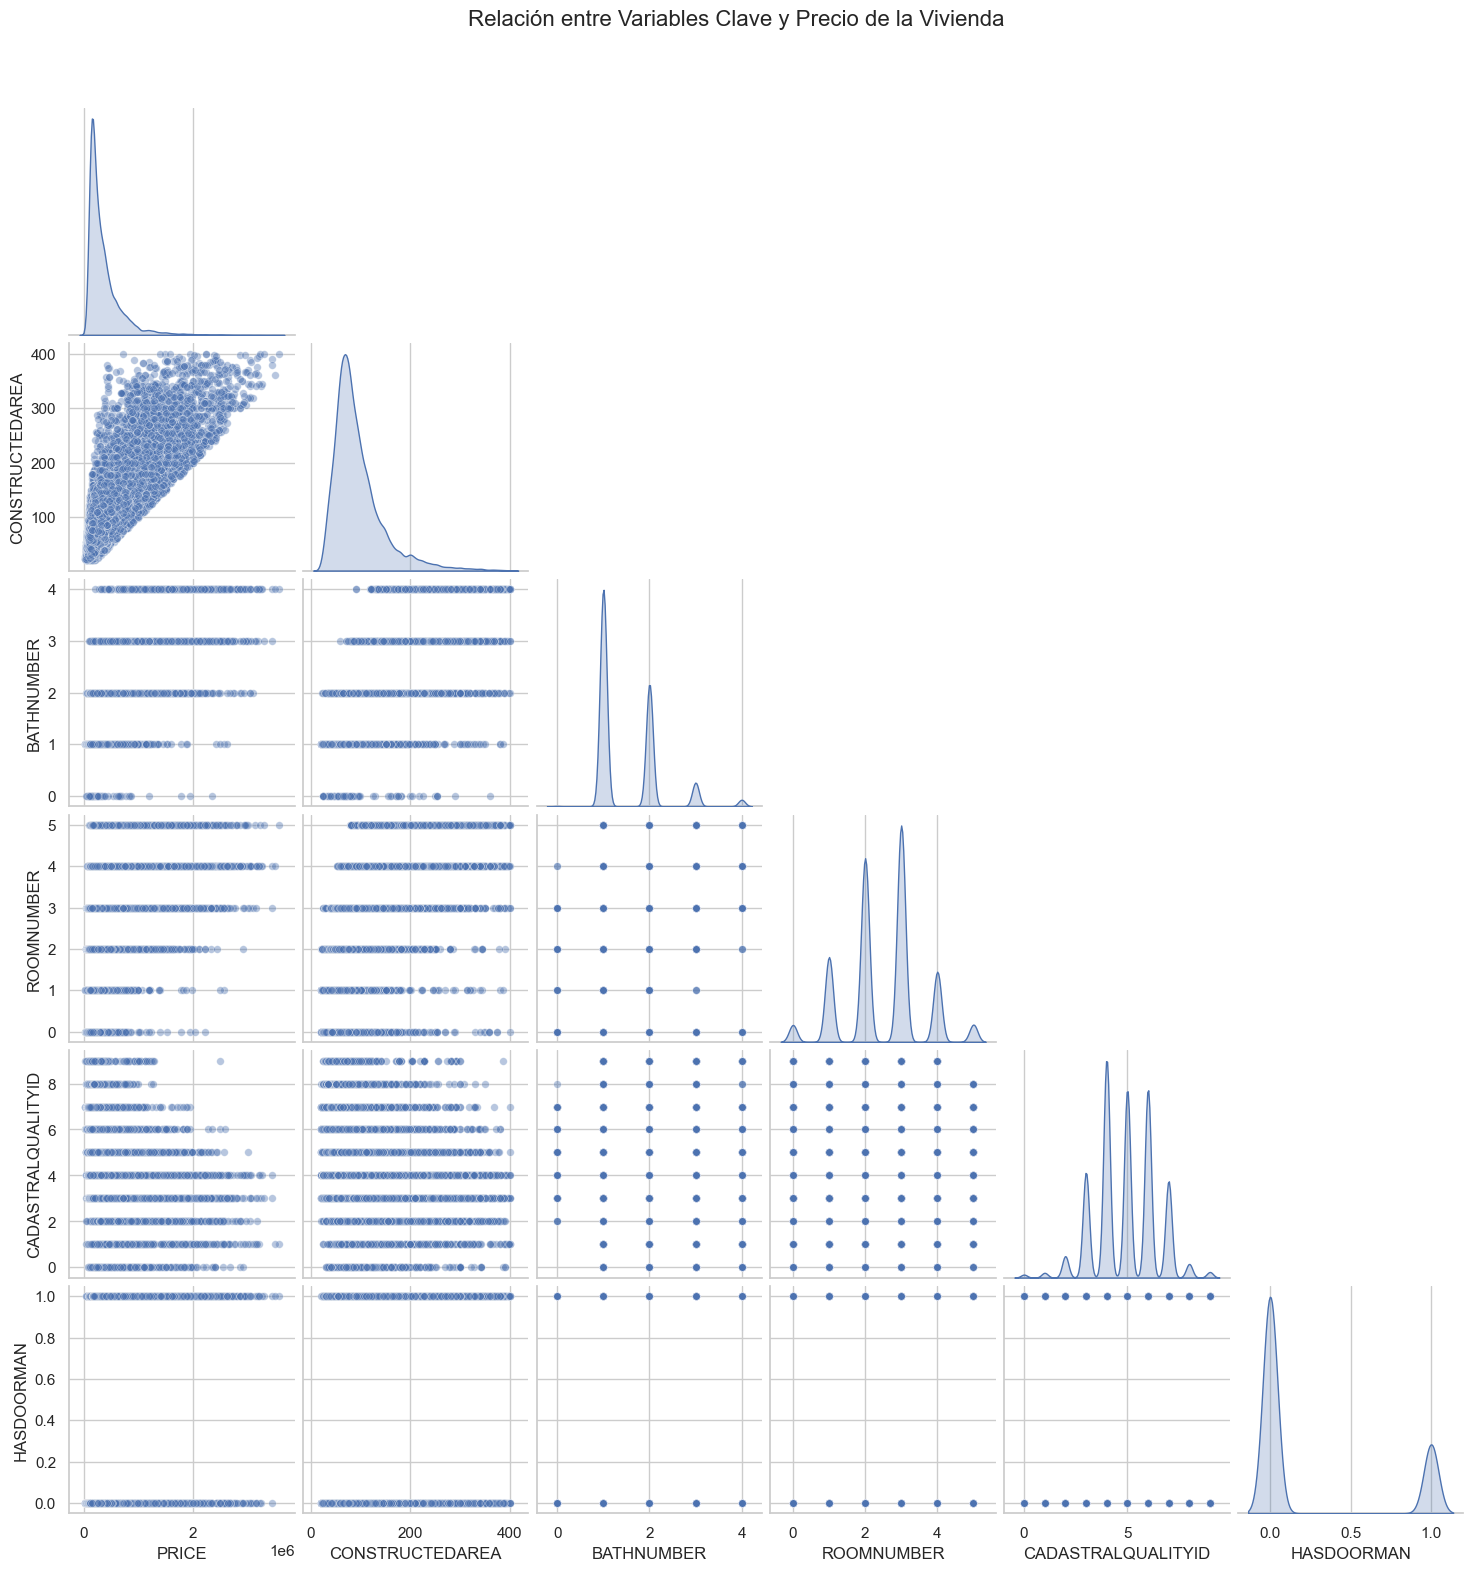

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Definimos la lista de variables basada en el análisis de correlación
variables_clave = [
    'PRICE', 
    'CONSTRUCTEDAREA', 
    'BATHNUMBER', 
    'ROOMNUMBER', 
    'CADASTRALQUALITYID',
    'HASDOORMAN'
]

# 2. Creamos un sub-dataframe solo con esas columnas y eliminamos nulos para el gráfico
df_grafico = df[variables_clave].dropna()

# 3. Configuramos el estilo visual
sns.set_theme(style="whitegrid")

# 4. Creamos el pairplot
# height=2.5 controla el tamaño de cada subgráfico
# corner=True evita mostrar la mitad superior duplicada
# plot_kws ayuda a que los puntos no se amontonen (transparencia y tamaño)
g = sns.pairplot(
    df_grafico, 
    kind='scatter', 
    diag_kind='kde', 
    corner=True,
    plot_kws={'alpha': 0.4, 's': 30, 'edgecolor': 'w'},
    diag_kws={'fill': True}
)

# 5. Añadimos un título general
g.fig.suptitle('Relación entre Variables Clave y Precio de la Vivienda', fontsize=16, y=1.05)

plt.show()

PRICE - CONSTRUCTEDAREA



Relación Lineal: Relación lineal positiva monotónica

El precio es predecible para casas pequeñas pero se observa dispersión del precio cuando los inmuebles son mayores (ubicación, acabados, etc.).  



BATHNUMBER y ROOMNUMBER



Como no puedes tener 2.5 baños, los puntos se alinean en niveles (1, 2, 3...). También lo vemos en la distribución 



CADASTRALQUALITYID (Calidad Catastral)



Distribución mayormente normal con picos similares por el tipo de dato no decimal que pueden contener



La mayoría de tus viviendas se agrupan en categorías de calidad 4, 5 y 6



HASDOORMAN



La distribución y el grafico scatter nos indican que es una variable binaria



Conclusion: Probablemente quitaria los outliers de las mansiones de 15 baños o 25 habitaciones porque no nos aportan datos 


In [ ]:
# Análisis de todas las variables numéricas NO BINARIAS del df. 
#   - Excluye las variables binarias por defecto para que no generen ruido
#   - variables_excluidas = []. Permite excluir varibles específicas manualmente
#   - Permite definir el número de desviaciones típicas para considera outliers en el parámetro "std_threshold=4"
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, entropy, trim_mean, jarque_bera

def analisis_estadistico_completo(df, variables_excluidas=None, std_threshold=4):
    if variables_excluidas is None:
        variables_excluidas = []

    resultados = {}

    for col in df.select_dtypes(include=["int64", "float64"]).columns:

        # excluir explícitas
        if col in variables_excluidas:
            continue

        s = df[col].dropna()

        # excluir binarias puras 0/1
        valores_unicos = set(s.unique())
        if valores_unicos.issubset({0, 1}) and len(valores_unicos) <= 2:
            continue

        n = s.count()
        if n == 0:
            continue

        # Cálculos base
        mean = s.mean()
        std = s.std()
        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        median = s.median()
        mad = np.median(np.abs(s - median))
        
        # Nombre dinámico para la columna de atípicos por STD
        col_name_std = f"outliers_std{std_threshold}"

        resultados[col] = {
            # tamaño y calidad
            "count": n,
            "missing": df[col].isna().sum(),
            "pct_missing": df[col].isna().mean(),
            "n_unique": s.nunique(),
            "pct_zeros": (s == 0).mean(),

            # tendencia central
            "mean": mean,
            "median": median,
            "mode": s.mode().iloc[0] if not s.mode().empty else np.nan,
            "trimmed_mean_10pct": trim_mean(s, 0.1),

            # dispersión
            "std": std,
            "var": s.var(),
            "cv": std / mean if mean != 0 else np.nan,
            "mad": mad,
            "robust_std": 1.4826 * mad,

            # extremos
            "min": s.min(),
            "max": s.max(),
            "range": s.max() - s.min(),
            "max_median_ratio": s.max() / median if median != 0 else np.nan,

            # cuantiles
            "q1": q1,
            "q3": q3,
            "iqr": iqr,
            "p1": s.quantile(0.01),
            "p5": s.quantile(0.05),
            "p95": s.quantile(0.95),
            "p99": s.quantile(0.99),
            "p90_p10_range": s.quantile(0.90) - s.quantile(0.10),

            # forma
            "skewness": skew(s),
            "kurtosis": kurtosis(s),
            "iqr_asymmetry": (q3 - median) / (median - q1) if (median - q1) != 0 else np.nan,

            # outliers clásicos
            "outliers_low": (s < q1 - 1.5 * iqr).sum(),
            "outliers_high": (s > q3 + 1.5 * iqr).sum(),
            "outliers_total": ((s < q1 - 1.5 * iqr) | (s > q3 + 1.5 * iqr)).sum(),
            "outliers_hampel": (np.abs(s - median) > 3 * mad).sum() if mad != 0 else 0,
            
            # --- NUEVA COLUMNA DINÁMICA ---
            col_name_std: ((s < mean - std_threshold * std) | (s > mean + std_threshold * std)).sum(),

            # información
            "entropy": entropy(s.value_counts(normalize=True)),

            # normalidad
            "jarque_bera_stat": jarque_bera(s)[0],
            "jarque_bera_pvalue": jarque_bera(s)[1],

            # impacto de outliers
            "outlier_impact_mean": (
                (mean - trim_mean(s, 0.1)) / mean
                if mean != 0 else np.nan
            )
        }

    return pd.DataFrame(resultados).T

estadisticos_no_binarias = analisis_estadistico_completo(df)
estadisticos_no_binarias

,count,missing,pct_missing,n_unique,pct_zeros,mean,median,mode,trimmed_mean_10pct,std,var,cv,mad,robust_std,min,max,range,max_median_ratio,q1,q3,iqr,p1,p5,p95,p99,p90_p10_range,skewness,kurtosis,iqr_asymmetry,outliers_low,outliers_high,outliers_total,outliers_hampel,outliers_std4,entropy,jarque_bera_stat,jarque_bera_pvalue,outlier_impact_mean
PRICE,74058.00,0.00,0.00,2159.00,0.00,358723.99,251000.00,137000.00,296249.85,326362.39,106512407672.61,0.91,115000.00,170499.00,21000.00,3566000.00,3545000.00,14.21,156000.00,438000.00,282000.00,69000.00,95000.00,959000.00,1731000.00,615000.00,2.86,11.94,1.97,0.00,4880.00,4880.00,11072.00,837.00,6.63,541144.77,0.00,0.17
UNITPRICE,74058.00,0.00,0.00,26041.00,0.00,3611.47,3410.00,2000.00,3467.60,1699.39,2887925.32,0.47,1250.00,1853.25,805.31,9994.29,9188.98,2.93,2187.50,4700.00,2512.50,1071.27,1400.00,6717.04,8541.87,4244.04,0.74,0.26,1.06,0.00,794.00,794.00,2510.00,0.00,9.54,7001.93,0.00,0.04
CONSTRUCTEDAREA,74058.00,0.00,0.00,371.00,0.00,94.64,80.00,60.00,86.82,51.37,2639.22,0.54,23.00,34.10,21.00,400.00,379.00,5.00,61.00,112.00,51.00,29.00,40.00,200.00,290.43,110.00,1.90,4.98,1.68,0.00,4510.00,4510.00,8718.00,578.00,4.91,121382.12,0.00,0.08
ROOMNUMBER,74058.00,0.00,0.00,6.00,0.03,2.49,3.00,3.00,2.49,1.06,1.13,0.43,1.00,1.48,0.00,5.00,5.00,1.67,2.00,3.00,1.00,0.00,1.00,4.00,5.00,3.00,-0.03,-0.12,0.00,2139.00,2186.00,4325.00,0.00,0.00,1.47,58.98,0.00,0.00
BATHNUMBER,74058.00,0.00,0.00,5.00,0.00,1.51,1.00,1.00,1.39,0.70,0.49,0.46,0.00,0.00,0.00,4.00,4.00,4.00,1.00,2.00,1.00,1.00,1.00,3.00,4.00,1.00,1.30,1.48,NaN,0.00,1314.00,1314.00,0.00,0.00,0.93,27708.50,0.00,0.08
AMENITYID,74058.00,0.00,0.00,3.00,0.00,2.93,3.00,3.00,3.00,0.31,0.10,0.11,0.00,0.00,1.00,3.00,2.00,1.00,3.00,3.00,0.00,1.00,2.00,3.00,3.00,0.00,-4.59,21.82,NaN,4356.00,0.00,4356.00,0.00,1026.00,0.26,1728990.55,0.00,-0.02
CONSTRUCTIONYEAR,74058.00,0.00,0.00,186.00,0.00,1965.12,1968.00,1960.00,1968.20,41.55,1726.73,0.02,16.00,23.72,7.00,2020.00,2013.00,1.03,1955.00,1986.00,31.00,1880.00,1900.00,2008.00,2018.00,85.00,-19.62,840.89,1.38,5136.00,0.00,5136.00,7697.00,30.00,4.29,2186674638.40,0.00,-0.00
FLOORCLEAN,74058.00,0.00,0.00,13.00,0.11,2.74,2.00,1.00,2.48,2.25,5.06,0.82,1.00,1.48,-1.00,11.00,12.00,5.50,1.00,4.00,3.00,-1.00,0.00,7.00,11.00,6.00,1.16,1.61,2.00,0.00,1852.00,1852.00,8030.00,0.00,2.09,24515.67,0.00,0.09
FLATLOCATIONID,74058.00,0.00,0.00,3.00,0.00,1.27,1.00,1.00,1.12,0.58,0.33,0.46,0.00,0.00,1.00,3.00,2.00,3.00,1.00,1.00,0.00,1.00,1.00,3.00,3.00,1.00,2.04,2.93,NaN,0.00,14765.00,14765.00,0.00,0.00,0.63,77846.28,0.00,0.11
CADCONSTRUCTIONYEAR,74058.00,0.00,0.00,167.00,0.00,1965.64,1967.00,1960.00,1967.79,28.86,832.95,0.01,14.00,20.76,1623.00,2018.00,395.00,1.03,1955.00,1983.00,28.00,1890.00,1901.00,2008.00,2017.00,78.00,-0.80,1.93,1.33,4929.00,0.00,4929.00,9137.00,76.00,4.31,19490.55,0.00,-0.00


In [ ]:
# Análisis de todas las variables numéricas BINARIAS del df. 
#   - variables_excluidas = []. Permite excluir varibles específicas manualmente
import pandas as pd
import numpy as np
from scipy.stats import entropy

def analisis_binarias(df, variables_excluidas=None, rare_threshold=0.05):
    """
    Detecta y analiza variables binarias en un DataFrame de forma independiente.
    Identifica variables con 2 valores únicos (numéricas, booleanas o strings).
    """
    if variables_excluidas is None:
        variables_excluidas = []

    resultados = {}

    for col in df.columns:
        # 1. Exclusión explícita
        if col in variables_excluidas:
            continue

        s = df[col].dropna()
        n = s.count()
        
        if n == 0:
            continue

        # 2. Detección de binarias
        # Filtro: debe tener 1 o 2 valores únicos (si tiene 1 puede ser una constante binaria)
        valores_unicos = s.unique()
        if len(valores_unicos) > 2 or len(valores_unicos) == 0:
            continue
            
        # 3. Cálculo de proporciones
        # Si la variable es numérica 0/1, p1 es la media. 
        # Si es categórica, tomamos el primer valor como referencia.
        v1 = valores_unicos[0]
        p1 = (s == v1).mean()
        p0 = 1 - p1

        resultados[col] = {
            # Tamaño y calidad
            "count": n,
            "missing": df[col].isna().sum(),
            "pct_missing": df[col].isna().mean(),
            "n_unique": len(valores_unicos),
            "val_ref": v1, # Guardamos qué valor representa el pct_ref

            # Proporciones
            "pct_ref": p1,
            "pct_others": p0,
            "imbalance": abs(p1 - p0),

            # Dispersión (Bernoulli variance)
            "variance": p1 * p0,

            # Información
            "entropy": entropy([p0, p1]) if p0 > 0 and p1 > 0 else 0,

            # Diagnóstico
            "is_constant": len(valores_unicos) == 1,
            "is_rare_event": p1 < rare_threshold or p1 > (1 - rare_threshold)
        }

    return pd.DataFrame(resultados).T

estadisticos_binarias = analisis_binarias(df)
estadisticos_binarias

,count,missing,pct_missing,n_unique,val_ref,pct_ref,pct_others,imbalance,variance,entropy,is_constant,is_rare_event
HASTERRACE,74058,0,0.00,2,0,0.65,0.35,0.30,0.23,0.65,False,False
HASLIFT,74058,0,0.00,2,1,0.68,0.32,0.37,0.22,0.62,False,False
HASAIRCONDITIONING,74058,0,0.00,2,1,0.44,0.56,0.13,0.25,0.69,False,False
HASPARKINGSPACE,74058,0,0.00,2,0,0.79,0.21,0.57,0.17,0.52,False,False
ISPARKINGSPACEINCLUDEDINPRICE,74058,0,0.00,2,0,0.79,0.21,0.57,0.17,0.52,False,False
HASNORTHORIENTATION,74058,0,0.00,2,0,0.90,0.10,0.79,0.09,0.33,False,False
HASSOUTHORIENTATION,74058,0,0.00,2,0,0.77,0.23,0.54,0.18,0.54,False,False
HASEASTORIENTATION,74058,0,0.00,2,0,0.80,0.20,0.61,0.16,0.49,False,False
HASWESTORIENTATION,74058,0,0.00,2,0,0.86,0.14,0.72,0.12,0.41,False,False
HASBOXROOM,74058,0,0.00,2,1,0.24,0.76,0.51,0.18,0.56,False,False
